In [2]:
import numpy as np
import pandas as pd
import scipy
import sklearn

<h1>Mean and Variance


In [3]:
# Create a python array
x = np.array([[0,1,2,3,4,5]])
print(x)

x_mean = x.mean()
x_variance = x.var()
print("Mean: {:.2f}\nVariance:{:.2f}".format(x_mean,x_variance))

[[0 1 2 3 4 5]]
Mean: 2.50
Variance:2.92


<h1> Covariance

![alt text](covar.png "Title")

In [4]:
MAT_X = np.array([[0, 3], [1, 1], [2, 0]]).T
print(f"This is the array:")
print(MAT_X)

# Computer the covar (method 1)

X_bar = np.mean(MAT_X,axis=1)[:,np.newaxis]
print("This is the x_bar:")
print(X_bar)
print("This is the shape:")
print(MAT_X.shape)
n = MAT_X.shape[0]
print("This is the n:")
print(n)
conv_X = (MAT_X-X_bar)@(MAT_X-X_bar).T/n  # Dot Product
print('convariance for method 1', conv_X)

#Computing the covariance (method 2)
print('convariance for method 2') 
print(np.cov(MAT_X))



This is the array:
[[0 1 2]
 [3 1 0]]
This is the x_bar:
[[1.        ]
 [1.33333333]]
This is the shape:
(2, 3)
This is the n:
2
convariance for method 1 [[ 1.         -1.5       ]
 [-1.5         2.33333333]]
convariance for method 2
[[ 1.         -1.5       ]
 [-1.5         2.33333333]]


# Indexing

In [5]:
y = np.array([[1,2],[3,4],[5,6]])
print(y)
print(y[2,1])
print(y[:,1])
print(y[:1,1])
print(y[:,:])

[[1 2]
 [3 4]
 [5 6]]
6
[2 4 6]
[2]
[[1 2]
 [3 4]
 [5 6]]


# Dot Product

In [6]:
# create another python array
Y = np.array([0, 1, 2, 3, 4, 5])
print(x,Y)
#dot product
dot_1 = np.dot(x,Y)
dot_2 = x@Y 
print('dot product np.dot(X,Y)',dot_1)
print('dot product X@Y', dot_2)

[[0 1 2 3 4 5]] [0 1 2 3 4 5]
dot product np.dot(X,Y) [55]
dot product X@Y [55]


# Sort  

In [7]:
us_arr = np.array([77,2,100,5])

print('original array',us_arr)

us_arr.sort()

print('sorted array',us_arr)

original array [ 77   2 100   5]
sorted array [  2   5  77 100]


# Eigenvalue and Eigenvectors

![alt text](eigen.png "Title")

In [8]:
a = np.array([[1,0],[0,2]])
print(a)
eig_val, eig_vec = np.linalg.eig(a)
print('engivalue:')
print(eig_val)
print('engivector;')
print(eig_vec)

[[1 0]
 [0 2]]
engivalue:
[1. 2.]
engivector;
[[1. 0.]
 [0. 1.]]


![alt text](pca_framework.png "Title")

In [9]:
# a simple PAC implementation
def pca_our(X,n_components,norm=True):
  #1. Standariation 
  ##mean of each feature
  mean = np.mean(X.T,axis=1)[np.newaxis,:]
  n = X.shape[0]
  n_features = X.shape[1]
  ##Minus its mean
  if norm:
   norm_X=X-mean
  else:
    norm_X = X
  #2. computing the covariance matrix
  #conv_X = np.cov(X.T)
  conv_X = (norm_X).T@(norm_X)/n

  #3. Calculate the eigenvectors and eigenvalues
  eig_val, eig_vec = np.linalg.eig(conv_X)
  ##take the absolute value for eig_val
  eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(n_features)]
  #4. sort eig_vec based on eig_val from highest to lowest
  ## find the index
  eig_pairs.sort(reverse=True)
  #5. select the top k eig_vec
  feature=np.array([pair[1] for pair in eig_pairs[:n_components]])
  #get new output
  Y= -norm_X @ feature.T
  return Y


In [10]:
from sklearn.decomposition import PCA


In [11]:
test = np.array([[-1, 2,3], [-2, -3, 6], [-3, -4,7], [1, 5, 8], [2, 3, 5], [3, 4, 6]])
print(test)

#Computer version
pca1 = PCA(n_components=2)
principalComponents1 = pca1.fit_transform(test)

print(principalComponents1)

#our version
pca2 = pca_our(test, n_components=2)
print(pca2)

[[-1  2  3]
 [-2 -3  6]
 [-3 -4  7]
 [ 1  5  8]
 [ 2  3  5]
 [ 3  4  6]]
[[-0.26467664  2.93611956]
 [ 4.60690614 -0.11174648]
 [ 5.99636929 -1.04719645]
 [-3.76455725 -2.13070775]
 [-2.61223261  0.70448475]
 [-3.96180893 -0.35095362]]
[[-0.26467664  2.93611956]
 [ 4.60690614 -0.11174648]
 [ 5.99636929 -1.04719645]
 [-3.76455725 -2.13070775]
 [-2.61223261  0.70448475]
 [-3.96180893 -0.35095362]]


In [12]:
mean = np.mean(test.T, axis=1)[:,np.newaxis]  #axis =1 means rows does, but [:,np.newaxis] puts all data into new rows
print(mean)

test.shape[0] # number of rows
test.shape[1] # number of features

[[0.        ]
 [1.16666667]
 [5.83333333]]


3

# Using on live data


### Downloading Data


In [13]:
#download the data
import wget
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

--2021-10-19 23:46:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: 'iris.data.2'

     0K ....                                                  100%  180M=0s

2021-10-19 23:46:52 (180 MB/s) - 'iris.data.2' saved [4551/4551]



In [14]:
from sklearn.preprocessing import StandardScaler 
features = ["sepal length", "sepal width", "petal length", "petal width"]
df = pd.read_csv('iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

# separating features into an array

x_raw = df.loc[:,features].values


#separating target into an array
y = df.loc[:,['target']].values

#standardizing the features
x = StandardScaler().fit_transform(x_raw)


In [15]:
x_raw

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Reduce to one-dimension

In [17]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)


## plot on scatter plot

Text(0.5, 1.0, 'One Component')

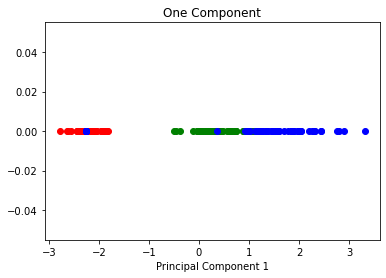

In [18]:
import matplotlib.pyplot as plt

y_1 = np.where(y == "Iris-setosa")
y_2 = np.where(y == "Iris-versicolor")
y_3 = np.where(y == "Iris-virginica")

plt.scatter(principalComponents[y_1,0],
            np.zeros_like(principalComponents[y_1,0]), c = 'red')
plt.scatter(principalComponents[y_2,0],
            np.zeros_like(principalComponents[y_2,0]), c = "green")
plt.scatter(principalComponents[y_3,0],
            np.zeros_like(principalComponents[y_3,0]), c = "blue")
plt.xlabel('Principal Component 1')
plt.title('One Component')

# Reduce to two dimensions

Text(0.5, 1.0, 'Two Components')

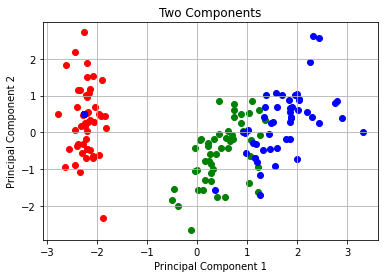

In [19]:
plt.grid()

pca_2 = PCA(n_components=2)
principalComponents_2 = pca_2.fit_transform(x)

y_1 = np.where(y == "Iris-setosa")
y_2 = np.where(y == "Iris-versicolor")
y_3 = np.where(y == "Iris-virginica")

plt.scatter(principalComponents_2[y_1,0],
            principalComponents_2[y_1,1], c = "red")
plt.scatter(principalComponents_2[y_2,0],
            principalComponents_2[y_2,1], c = "green")
plt.scatter(principalComponents_2[y_3,0],
            principalComponents_2[y_3,1], c = "blue")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Two Components")

# Reduce to 3 components

Text(0.5, 0.92, '3 Components')

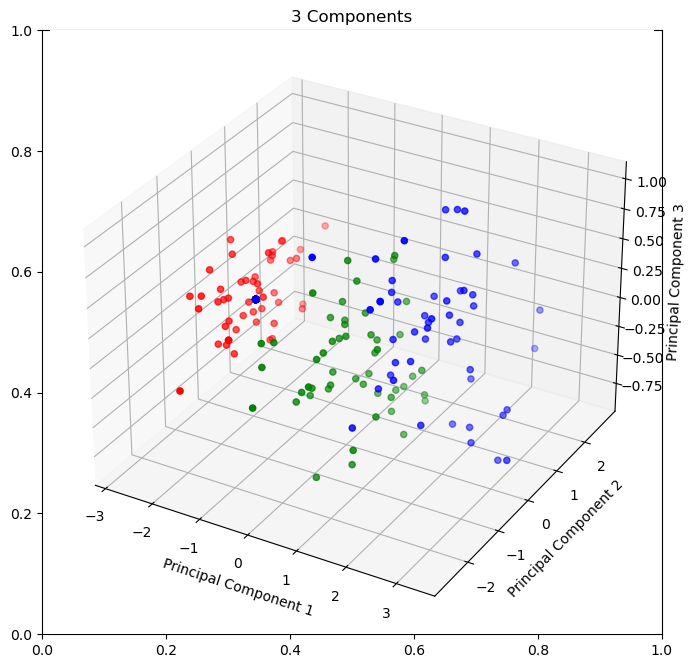

In [20]:
pca_3 = PCA(n_components=3)
principalComponents_3 = pca_3.fit_transform(x)
fig, axes = plt.subplots(1,1,figsize=(8,8), dpi=100)

ax = plt.axes(projection="3d")

y_1 = np.where(y == "Iris-setosa")
y_2 = np.where(y == "Iris-versicolor")
y_3 = np.where(y == "Iris-virginica")

ax.scatter3D(principalComponents_3[y_1,0],
            principalComponents_3[y_1,1],
            principalComponents_3[y_1,2], c = 'red');
ax.scatter3D(principalComponents_3[y_2,0],
            principalComponents_3[y_2,1],
            principalComponents_3[y_2,2], c = 'green');
ax.scatter3D(principalComponents_3[y_3,0],
            principalComponents_3[y_3,1],
            principalComponents_3[y_3,2], c = 'blue');

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.title('3 Components')

# Feature analysis: Biplot

the first compenent [-2.26454173  0.5057039  -0.12194335 -0.02307332]
the ranking of important features is:
petal length
petal width
sepal length
sepal width


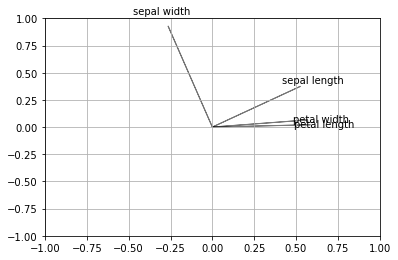

In [21]:
plt.grid()
plt.xlim(-1,1)
plt.ylim(-1,1)

pca_4 = PCA(n_components=4)
principalComponents_4 = pca_4.fit_transform(x)
print('the first compenent', principalComponents_4[0,:])

coeff = np.transpose(pca_4.components_[0:2,:])  #wtf is this

n = coeff.shape[0]
for i in range(n):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color= 'black', alpha= 0.5)
    plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, features[i], color = 'black', ha = 'center', va = 'center')

imp_rank = np.argsort(abs( pca.components_ )[0,:])[::-1]
print('the ranking of important features is:')
for j in imp_rank:
    print(features[j]) 

eigenvalues [2.93035378 0.92740362 0.14834223 0.02074601]
explain_ratio method 1 [0.72770452 0.23030523 0.03683832 0.00515193]
explain_ratio method 2 [0.72770452 0.23030523 0.03683832 0.00515193]
accumulated explain_ratio  [0.73 0.96 0.99 1.  ]


Text(0.5, 0, 'Number of Principal Components')

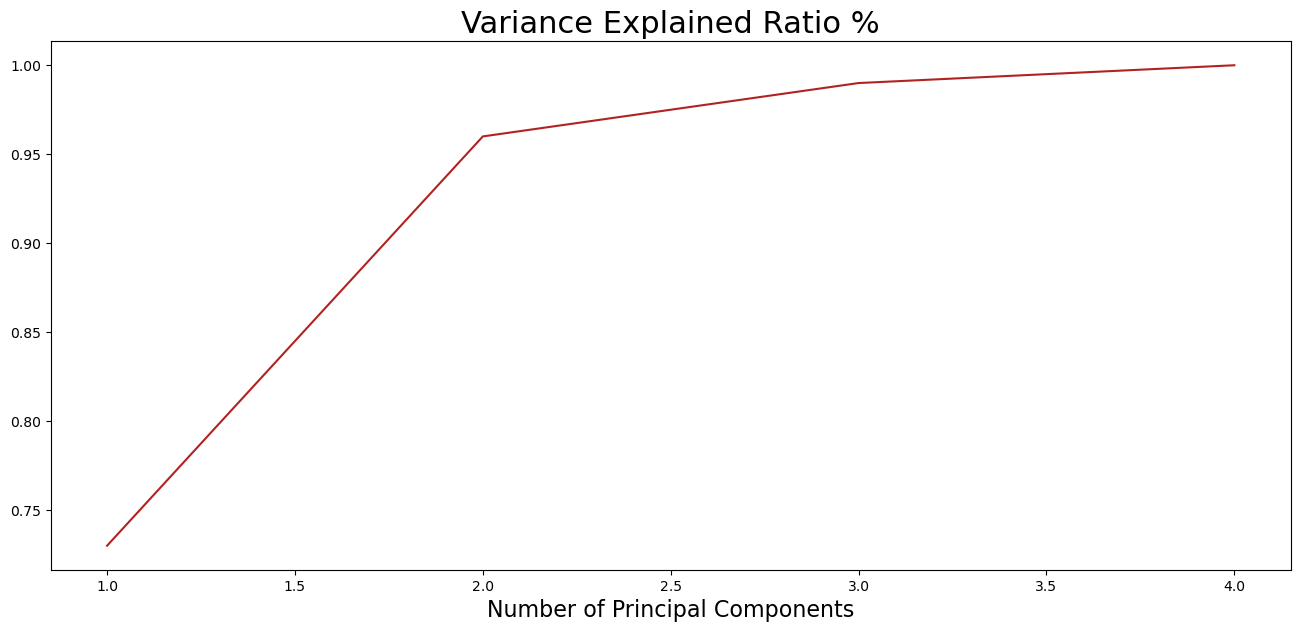

In [22]:
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
eigenvalue = pca.explained_variance_
print('eigenvalues',eigenvalue)
print('explain_ratio method 1',eigenvalue/eigenvalue.sum())
print('explain_ratio method 2',pca.explained_variance_ratio_)


explain_ratio = pca.explained_variance_ratio_.cumsum().round(2)
print('accumulated explain_ratio ',explain_ratio)

fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(range(1, 5), explain_ratio, color='firebrick')
plt.title('Variance Explained Ratio %', fontsize=22)
plt.xlabel('Number of Principal Components', fontsize=16)
